<a href="https://colab.research.google.com/github/ssumannb/CV_Anomaly_detection/blob/main/01_vgg_sm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import os
import pandas as pd

import seaborn as sns
from tensorflow.keras import layers
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

import cv2
import random


#'CLASS' classification

In [ ]:
train_info_org = pd.read_csv('/content/drive/MyDrive/수연/study/Data/train_df.csv')
train_info_org 

In [ ]:
train_info_org['Image_Path'] = 0
for i in range(len(train_info_org)):
  train_info_org['Image_Path'][i] = '/content/drive/MyDrive/수연/study/Data/train/'+train_info_org['file_name'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
train_info, valid_info = train_test_split(train_info_org, test_size=0.2)
print(train_info.info())
print(valid_info.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3421 entries, 498 to 4182
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       3421 non-null   int64 
 1   file_name   3421 non-null   object
 2   class       3421 non-null   object
 3   state       3421 non-null   object
 4   label       3421 non-null   object
 5   Image_Path  3421 non-null   object
dtypes: int64(1), object(5)
memory usage: 187.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 285 to 1161
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       856 non-null    int64 
 1   file_name   856 non-null    object
 2   class       856 non-null    object
 3   state       856 non-null    object
 4   label       856 non-null    object
 5   Image_Path  856 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.8+ KB
None


In [ ]:
print(train_info['class'].value_counts())
print(valid_info['class'].value_counts())

hazelnut      355
screw         306
pill          272
carpet        260
zipper        241
grid          232
tile          226
wood          226
leather       224
cable         215
capsule       210
metal_nut     206
bottle        197
transistor    184
toothbrush     67
Name: class, dtype: int64
screw         75
hazelnut      72
leather       69
pill          68
carpet        67
capsule       65
grid          62
metal_nut     62
zipper        60
cable         56
wood          52
transistor    49
tile          47
bottle        44
toothbrush     8
Name: class, dtype: int64


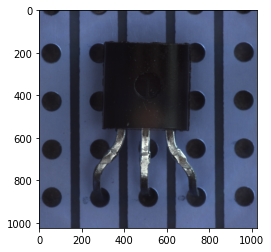

In [ ]:
# import matplotlib.image as img
# a = cv2.imread(train_info[train_info['class'] == 'transistor']['Image_Path'].values[2])

# plt.imshow(a)

In [ ]:
train_info[train_info['class'] == 'transistor']['Image_Path']

0       /content/drive/MyDrive/수연/study/Data/train/...
2       /content/drive/MyDrive/수연/study/Data/train/...
9       /content/drive/MyDrive/수연/study/Data/train/...
42      /content/drive/MyDrive/수연/study/Data/train/...
49      /content/drive/MyDrive/수연/study/Data/train/...
                              ...                        
4149    /content/drive/MyDrive/수연/study/Data/train/...
4203    /content/drive/MyDrive/수연/study/Data/train/...
4248    /content/drive/MyDrive/수연/study/Data/train/...
4272    /content/drive/MyDrive/수연/study/Data/train/...
4273    /content/drive/MyDrive/수연/study/Data/train/...
Name: Image_Path, Length: 233, dtype: object

In [ ]:
# print("Displaying transistor 5 Images: ")
# print()
# plt.figure(figsize = (12,12))
# for i in range(5):
#     plt.subplot(1, 5, i+1)
#     img = cv2.imread(train_info[train_info['class'] == 'transistor']['Image_Path'].values[i])
#     plt.imshow(img)
#     plt.tight_layout()
# plt.show()

Displaying capsule 5 Images: 



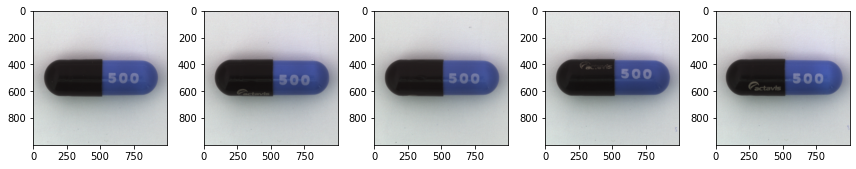

In [ ]:
# print("Displaying capsule 5 Images: ")
# print()
# plt.figure(figsize = (12,12))
# for i in range(5):
#     plt.subplot(1, 5, i+1)
#     img = cv2.imread(train_info[train_info['class'] == 'capsule']['Image_Path'].values[i])
#     plt.imshow(img)
#     plt.tight_layout()
# plt.show()

##Distribution Of samples

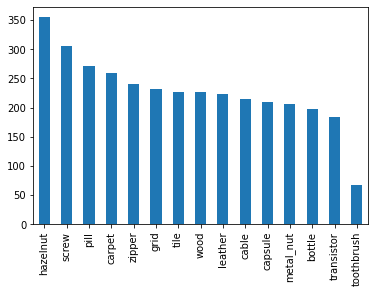

In [ ]:
train_info['class'].value_counts().plot(kind='bar')

88


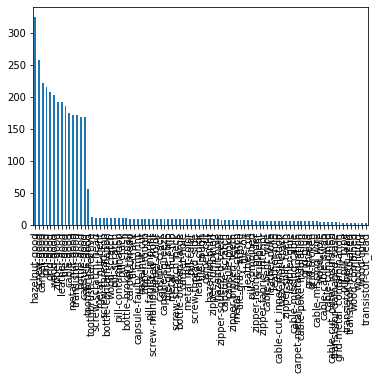

In [ ]:
train_info['label'].value_counts().plot(kind='bar')
print(len(train_info['label'].unique()))

#Image Preprocessing

In [ ]:
# resizing image for input size
# from sys import path

# PATH = "/content/drive/MyDrive/수연/study/Data/train_resize/"
# if not os.path.isdir(PATH):
#   os.mkdir(PATH)
  
# for i, img_path in enumerate(train_info['Image_Path']):
#   img = cv2.imread(img_path)
#   img_resize = cv2.resize(img, (224, 224))
#   img_name = f"{train_info['file_name'][i].split('.')[0]}.png"
#   f_name = f"{PATH}{img_name}"
  
#   cv2.imwrite(f_name, img_resize)


In [ ]:
# data seperate by class
# for i, cls in enumerate(train_info['label']):
#   dir = f"/content/drive/MyDrive/수연/study/Data/flow_from_directory/{cls}"
#   if not os.path.isdir(dir):
#     os.mkdir(dir)

# import shutil

# sPATH = "/content/drive/MyDrive/수연/study/Data/train_resize/"
# dPATH = "/content/drive/MyDrive/수연/study/Data/flow_from_directory/"
# for i, img_name in enumerate(train_info['file_name']):
#   state = train_info['state'][i]
#   f_name = f"{state}_{train_info['file_name'][i]}"
#   cls = train_info['label'][i]

#   src = f"{sPATH}{train_info['file_name'][i]}"
#   dst = f"{dPATH}{cls}/{f_name}"
#   shutil.copy(src, dst)

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

# Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten


base_model=tf.keras.applications.vgg19.VGG19(
              include_top=False,
              weights='imagenet',
              input_tensor=None,
              input_shape=(224,224,3),
              pooling=None,
              classes=len(train_info['label'].unique()),
              classifier_activation='softmax'
          )

from keras.layers import Dense, GlobalAveragePooling2D
global_average_layer = GlobalAveragePooling2D()

VGGmodel = tf.keras.Sequential([base_model,global_average_layer,
                                Flatten(),
                                Dense(4096, activation='relu'),
                                Dense(4096, activation='relu'),
                                Dense(88, activation='softmax')])


80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
# print(base_model.summary())
# print(VGGmodel.summary())

In [ ]:
from keras import backend as K

# define metric function for f1 score
def recall_func(y, pred):
  tp = K.sum(K.round(K.clip(y*pred, 0, 1)))
  p_positives = K.sum(K.round(K.clip(y, 0, 1)))
  recall = tp / (p_positives+K.epsilon())
  return recall

def precision_func(y, pred):
  tp = K.sum(K.round(K.clip(y*pred, 0, 1)))
  p_positives = K.sum(K.round(K.clip(pred, 0, 1)))
  precision = tp / (p_posotives+K.epsilon())
  return precision

def f1_func(y, pred):
  p = precison_func(y, pred)
  r = recall_func(y, pred)
  return 2*((p*r)/(p+r+K.epsilon()))


#https://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221226716255

# Model training

epoch, early stop, minibatch, learning rate scheduler..

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

PATH = "/content/drive/MyDrive/수연/study/Data/flow_from_directory/"
np.random.seed(999)

d_generator = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    rescale = 1. / 255
  )

tData_generator = d_generator.flow_from_directory(
    PATH,
    color_mode = 'rgb',
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical'
  )

Found 4277 images belonging to 88 classes.


In [ ]:
iterations = 5
images = []

for i in enumerate(range(iterations)):
  img, label = tData_generator.next()
  n_img = len(label)
  
  rows = 5
  cols = 4
  axes = []
  fig = plt.figure()

  for idx in range(n_img - 1):
    img2 = cv2.cvtColor(img[idx+1], cv2.COLOR_RGB2BGR)
    base = np.hstack((base, img2))
  
  images.append(base)
  break

img = images[0]
for idx in range(len(images) - 1):
  img = np.vstack((img, images[idx+1]))

cv2.imshow('result', img)

DisabledFunctionError: ignored

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# le.fit(train_info['label'])
# encoded_label = le.transform(train_info['label'])

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder
# from sklearn.preprocessing import OneHotEncoder

# od = OrdinalEncoder()
# oh = OneHotEncoder()

# encoded_label1 = od.fit_transform(train_info['label'])
# encoded_label2 = oh.fit_transform(train_info['label'])

In [ ]:
save_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/수연/study/model_cp/',
    monitor='train_loss',
    verbose=0,
    save_best_only=False,
    save_weight_only=True,
    mode='auto',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None
  )

In [ ]:
from keras import optimizers

VGGmodel.compile(loss='categorical_crossentropy', 
                 optimizer='adam',
                 metrics=['acc'])


history = VGGmodel.fit_generator(
    tData_generator,
    steps_per_epoch=67,
    epochs=100,
    callbacks=save_checkpoint
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


Epoch 1/100
 4/67 [>.............................] - ETA: 51:27 - loss: 24.2826 - acc: 0.0820

In [ ]:
model.predict()